# TUGAS 3
# NAMA  : Fahriant Ekrie
# NIM   : 24060121130071
# LAB   : C1

In [1]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9)

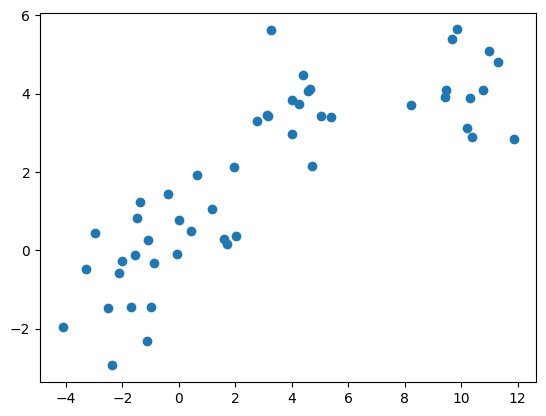

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

membandingkan hasil clustering pada dataset X1 dengan dua metode pengukuran jarak kluster yang berbeda: single linkage dan average linkage.

In [5]:
single_linkage = AgglomerativeClustering(n_clusters=4, linkage='single')
y_single = single_linkage.fit_predict(X1)

average_linkage = AgglomerativeClustering(n_clusters=4, linkage='average')
y_average = average_linkage.fit_predict(X1)

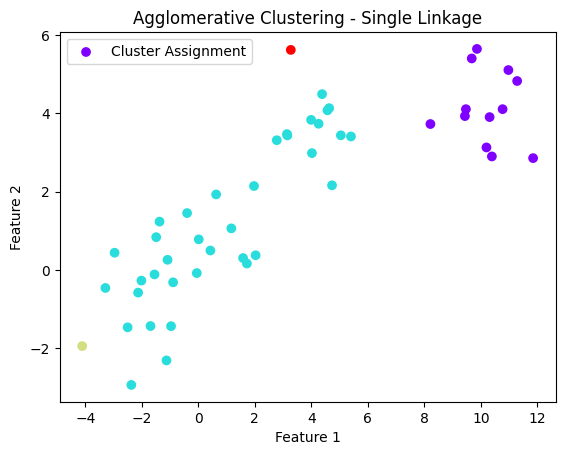

In [6]:
plt.scatter(X1[:, 0], X1[:, 1], c=y_single, cmap='rainbow', marker='o', label='Single Linkage')
plt.title("Agglomerative Clustering - Single Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(["Cluster Assignment"])
plt.show()

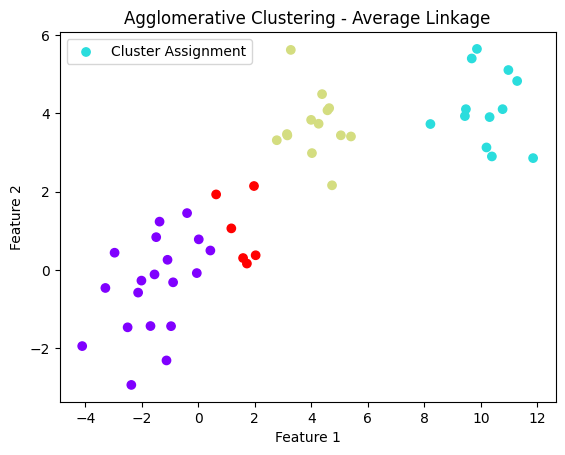

In [7]:
plt.scatter(X1[:, 0], X1[:, 1], c=y_average, cmap='rainbow', marker='o', label='Average Linkage')
plt.title("Agglomerative Clustering - Average Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(["Cluster Assignment"])
plt.show()

Kedua grafik menggambarkan hasil klasterisasi menggunakan metode **Agglomerative Clustering** dengan dua pendekatan linkage yang berbeda: **Average Linkage** dan **Single Linkage**.

- Pada **Average Linkage**, klaster terbentuk dengan distribusi data yang lebih homogen, dan setiap klaster cenderung lebih terpusat. Hal ini menunjukkan bahwa data dalam tiap klaster lebih seragam dan stabil.
  
- Sebaliknya, pada **Single Linkage**, klasterisasi lebih dipengaruhi oleh data ekstrem (outliers), yang terlihat jelas dengan adanya titik merah yang berdiri sendiri. Hal ini mencerminkan bahwa metode Single Linkage lebih sensitif terhadap titik data yang jauh dari pusat klaster, sehingga klaster bisa terbentuk secara tidak seimbang atau lebih memanjang.

Perbedaan ini menunjukkan bagaimana kedua pendekatan linkage memiliki karakteristik yang berbeda dalam membentuk klaster, dengan **Single Linkage** lebih rentan terhadap outliers, sementara **Average Linkage** menghasilkan klaster yang lebih stabil dan terpusat.

In [9]:
filename = 'cars_clus.csv'

pdf = pd.read_csv(filename)
print("Shape of dataset", pdf.shape)

pdf.head(20)

Shape of dataset (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0
5,Audi,A6,18.78,23.555,0,33.95,2.8,200,108.7,76.1,192,3.561,18.5,22,2.933,0
6,Audi,A8,1.38,39,0,62,4.2,310,113,74,198.2,3.902,23.7,21,0.322,0
7,BMW,323i,19.747,$null$,0,26.99,2.5,170,107.3,68.4,176,3.179,16.6,26.1,2.983,0
8,BMW,328i,9.231,28.675,0,33.4,2.8,193,107.3,68.5,176,3.197,16.6,24,2.223,0
9,BMW,528i,17.527,36.125,0,38.9,2.8,193,111.4,70.9,188,3.472,18.5,24.8,2.864,0


In [10]:
print("Shape of dataset before cleaning", pdf.size)
pdf[['sales', 'resale', 'type', 'price', 'engine_s',
     'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
     'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print("Shape of dataset after cleaning", pdf.size)
pdf.head(5)

Shape of dataset before cleaning 2544
Shape of dataset after cleaning 1888


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22,2.15,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27,3.015,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22,2.933,0


In [11]:
featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
print(featureset.head(5))

   engine_s  horsepow  wheelbas  width  length  curb_wgt  fuel_cap mpg
0       1.8     140.0     101.2   67.3   172.4     2.639      13.2  28
1       3.2     225.0     108.1   70.3   192.9     3.517      17.2  25
2       3.5     210.0     114.6   71.4   196.6     3.850      18.0  22
3       1.8     150.0     102.6   68.2   178.0     2.998      16.4  27
4       2.8     200.0     108.7   76.1   192.0     3.561      18.5  22


In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values
min_max_scaler = MinMaxScaler()

featureset = featureset.apply(pd.to_numeric, errors='coerce').dropna()

x = featureset.values

feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

In [ ]:
single = AgglomerativeClustering(n_clusters=6, linkage='single')
single.fit(feature_mtx)
print("Labels using Single Linkage (Scikit-learn):")
print(single.labels_)

average = AgglomerativeClustering(n_clusters=6, linkage='average')
average.fit(feature_mtx)
print("\nLabels using Average Linkage (Scikit-learn):")
print(average.labels_)

Labels using Single Linkage (Scikit-learn):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 5 1 4 2 0 0
 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0]

Labels using Average Linkage (Scikit-learn):
[0 4 4 0 4 4 0 4 4 4 4 4 4 4 4 0 0 4 4 4 1 0 3 0 0 4 0 4 0 0 0 1 5 2 2 4 4
 0 4 0 4 4 4 4 2 4 5 0 0 0 4 4 0 0 0 4 0 0 4 4 4 4 4 4 0 0 0 4 0 4 0 0 0 4
 4 4 4 0 4 4 1 0 0 4 4 4 0 4 4 4 0 0 4 0 0 4 4 4 0 0 0 0 0 0 0 0 4 0 0 0 0
 2 0 0 0 0 0]


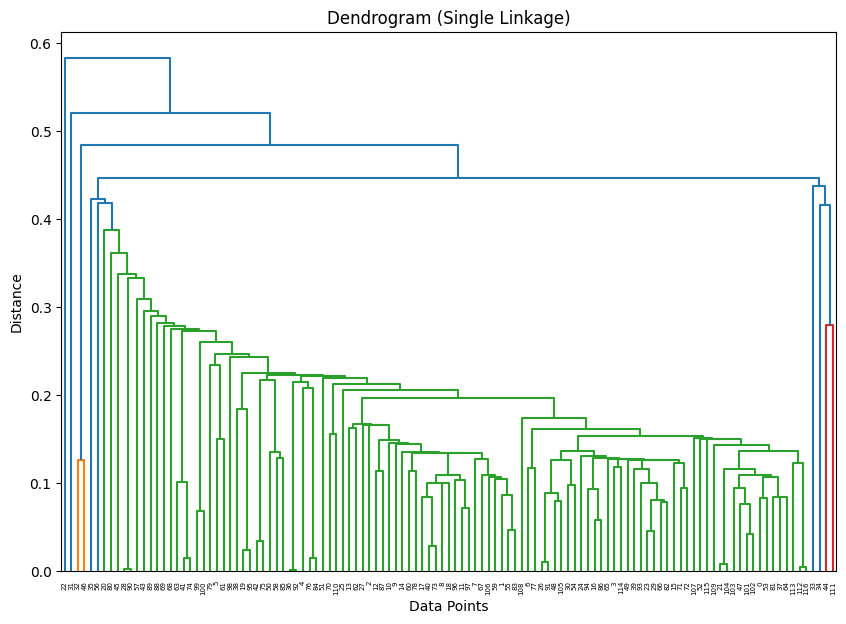

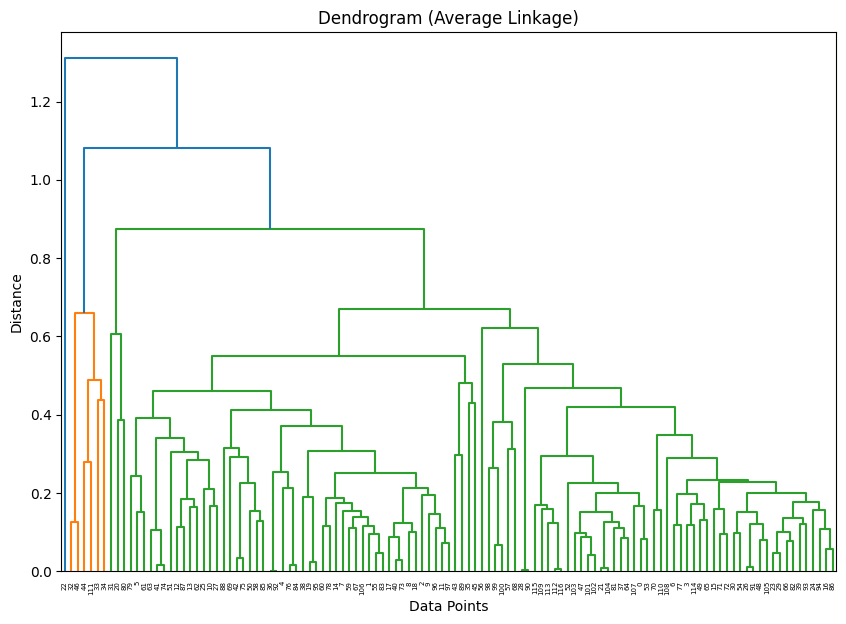

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Agglomerative Clustering menggunakan metode Single Linkage
Z_single = linkage(feature_mtx, method='single')

# Agglomerative Clustering menggunakan metode Average Linkage
Z_average = linkage(feature_mtx, method='average')

# Visualisasi Dendrogram untuk Single Linkage
plt.figure(figsize=(10, 7))
dendrogram(Z_single)
plt.title("Dendrogram (Single Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Visualisasi Dendrogram untuk Average Linkage
plt.figure(figsize=(10, 7))
dendrogram(Z_average)
plt.title("Dendrogram (Average Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [ ]:
import pandas as panda
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = panda.read_csv(url, names=names)
print(dataset.shape)
print(dataset.head(100))

(150, 5)
    sepal-length  sepal-width  petal-length  petal-width            Class
0            5.1          3.5           1.4          0.2      Iris-setosa
1            4.9          3.0           1.4          0.2      Iris-setosa
2            4.7          3.2           1.3          0.2      Iris-setosa
3            4.6          3.1           1.5          0.2      Iris-setosa
4            5.0          3.6           1.4          0.2      Iris-setosa
..           ...          ...           ...          ...              ...
95           5.7          3.0           4.2          1.2  Iris-versicolor
96           5.7          2.9           4.2          1.3  Iris-versicolor
97           6.2          2.9           4.3          1.3  Iris-versicolor
98           5.1          2.5           3.0          1.1  Iris-versicolor
99           5.7          2.8           4.1          1.3  Iris-versicolor

[100 rows x 5 columns]


In [ ]:
features = dataset[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]
target = dataset['Class']

Variabel `features` mengambil subset kolom-kolom yang mencakup 'sepal-length', 'sepal-width', 'petal-length', dan 'petal-width', yang merupakan atribut bunga yang akan digunakan sebagai input untuk analisis atau pelatihan model. Sedangkan variabel `target` berisi kolom 'Class', yang merepresentasikan label atau kategori kelas bunga, seperti 'Iris-setosa', 'Iris-versicolor', atau 'Iris-virginica'.

Pemisahan ini bertujuan untuk membedakan antara data yang digunakan sebagai input (fitur) bagi model dan data yang akan digunakan sebagai target (label) untuk evaluasi model. Dengan demikian, model dapat dilatih dengan menggunakan fitur untuk memprediksi kelas bunga yang sesuai.

In [ ]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
# Single Linkage Clustering using Scikit-learn
single_linkage = AgglomerativeClustering(n_clusters=3, linkage='single')
single_labels = single_linkage.fit_predict(features_scaled)

# Average Linkage Clustering using Scikit-learn
average_linkage = AgglomerativeClustering(n_clusters=3, linkage='average')
average_labels = average_linkage.fit_predict(features_scaled)

# Complete Linkage Clustering using Scikit-learn
complete_linkage = AgglomerativeClustering(n_clusters=3, linkage='complete')
complete_labels = complete_linkage.fit_predict(features_scaled)

# Print the labels for each method
print("\nSingle Linkage Labels:")
print(single_labels)

print("\nAverage Linkage Labels:")
print(average_labels)

print("\nComplete Linkage Labels:")
print(complete_labels)


Single Linkage Labels:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]

Average Linkage Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 1 2 2
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]

Complete Linkage Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 2 1 1
 2 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


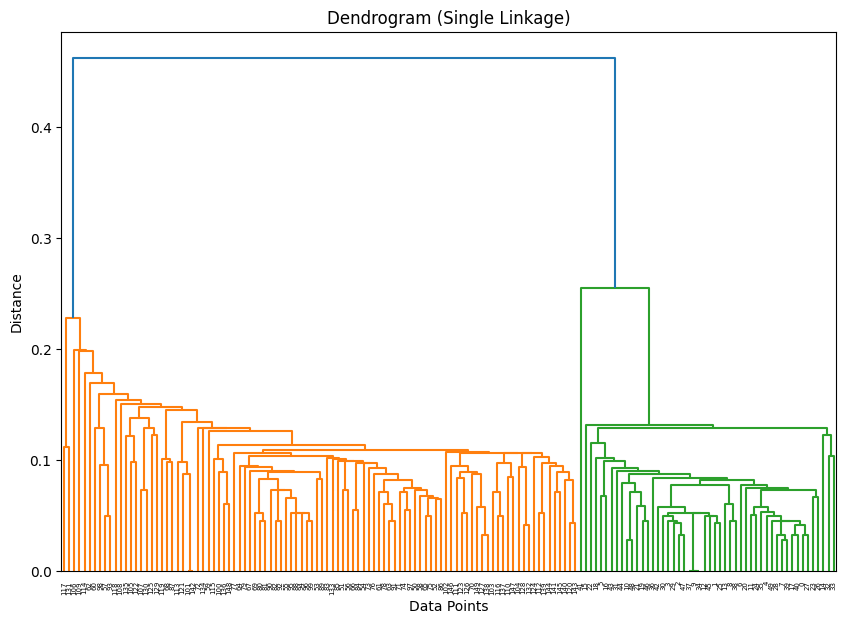

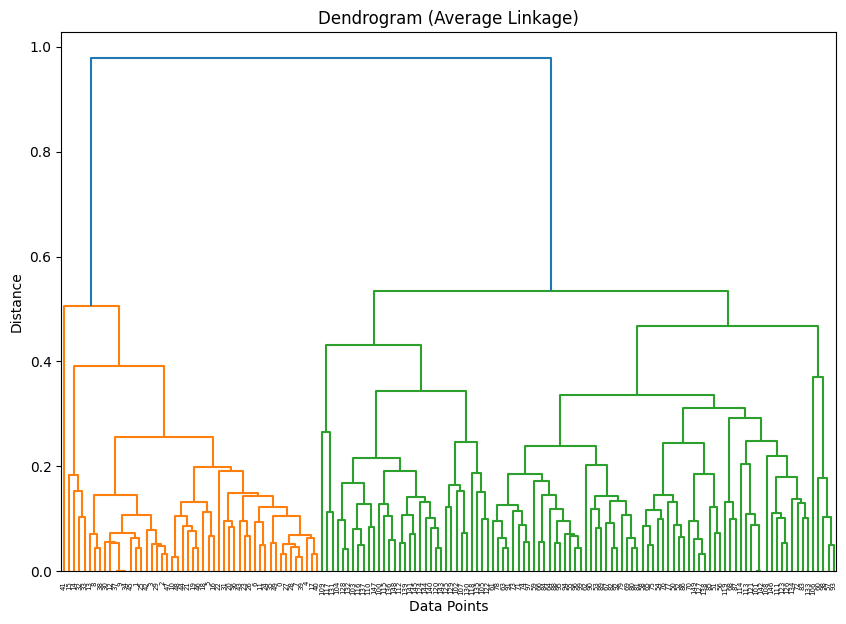

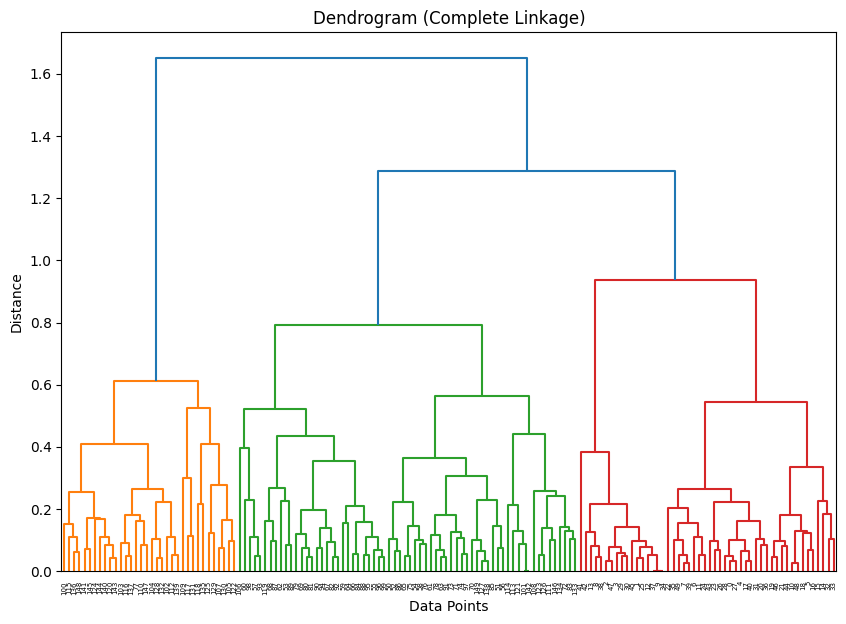

In [ ]:
Z_single = linkage(features_scaled, method='single')
plt.figure(figsize=(10, 7))
dendrogram(Z_single)
plt.title("Dendrogram (Single Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

Z_average = linkage(features_scaled, method='average')
plt.figure(figsize=(10, 7))
dendrogram(Z_average)
plt.title("Dendrogram (Average Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

Z_complete = linkage(features_scaled, method='complete')
plt.figure(figsize=(10, 7))
dendrogram(Z_complete)
plt.title("Dendrogram (Complete Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset = panda.read_csv(url, names=['sepal length', 'sepal width', 'pedal length', 'pedal width', 'Class'])

In [ ]:
features = ['sepal length', 'sepal width', 'pedal length', 'pedal width']
x = dataset.loc[:, features].values
y = dataset.loc[:, ['Class']].values
x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

In [ ]:
finalDF = pd.concat([principalDf, dataset[['Class']]], axis = 1)

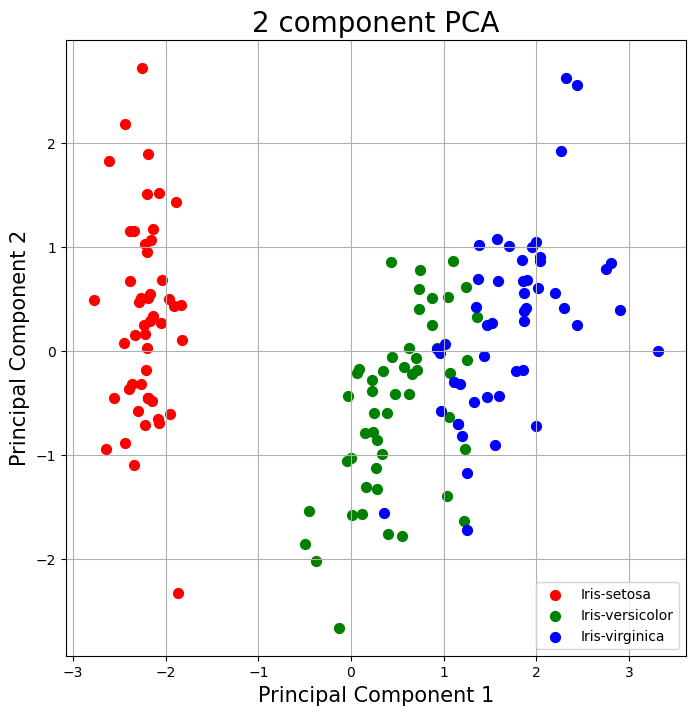

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['Class'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1'], finalDF.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

filename = 'cars_clus.csv'

pdf = pd.read_csv(filename, names=['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
                                   'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg'])

In [ ]:
features = ['sales', 'resale', 'price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap']
x = pdf.loc[:, features].values
x = pd.DataFrame(x, columns=features).apply(pd.to_numeric, errors='coerce').dropna().values
x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(principalDf)
principalDf['Cluster'] = kmeans.labels_

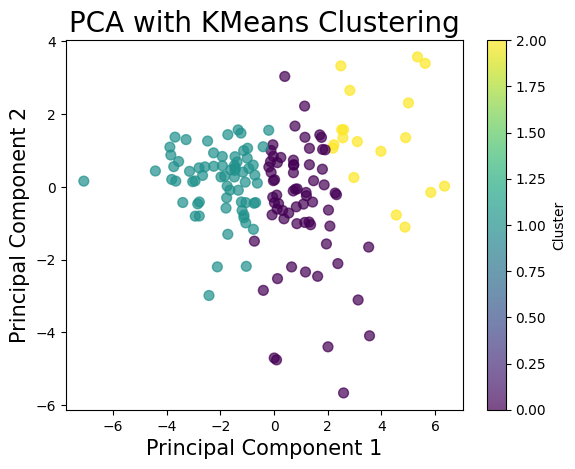

In [ ]:
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],
            c=principalDf['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('Principal Component 1', fontsize=15)
plt.ylabel('Principal Component 2', fontsize=15)
plt.title('PCA with KMeans Clustering', fontsize=20)
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)

[0.52758327 0.21452615]


In [ ]:
components = pd.DataFrame(pca.components_, columns=features, index=['PC1', 'PC2'])
print(components)

        sales    resale     price  engine_s  horsepow  wheelbas     width  \
PC1  0.217396  0.240168  0.304119  0.331088  0.357974  0.318855  0.409326   
PC2  0.299342 -0.513875 -0.400933  0.304517  0.064908  0.212079 -0.001722   

       length  curb_wgt  fuel_cap  
PC1  0.392513 -0.375716 -0.018957  
PC2  0.057043  0.058793  0.580470  
